<a href="https://colab.research.google.com/github/ajafarsadiq2002/image-classification-using-CNN-and-CIFAR10-Dataset/blob/main/imageclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


LOADING THE DATASETS

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 6s 0us/step


(50000, 32, 32, 3)

In [4]:
X_test.shape


(10000, 32, 32, 3)

Here we see there are 50000 training images and 10000 test images

In [5]:
y_train.shape

(50000, 1)

In [6]:

y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)


In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

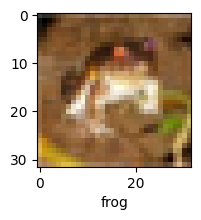

In [11]:
plot_sample(X_train, y_train, 0)


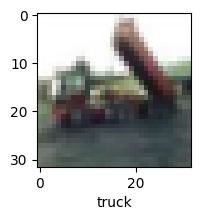

In [12]:
plot_sample(X_train, y_train, 2)

Normalizing the training data

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Build simple artificial neural network for image classification


In [15]:
ann=models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

In [16]:
ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 171s 109ms/step - loss: 1.8081 - accuracy: 0.3543
Epoch 2/10
1563/1563 [==============================] - 164s 105ms/step - loss: 1.6195 - accuracy: 0.4296
Epoch 3/10
1563/1563 [==============================] - 147s 94ms/step - loss: 1.5382 - accuracy: 0.4574
Epoch 4/10
1563/1563 [==============================] - 154s 98ms/step - loss: 1.4778 - accuracy: 0.4803
Epoch 5/10
1563/1563 [==============================] - 144s 92ms/step - loss: 1.4286 - accuracy: 0.4975
Epoch 6/10
1563/1563 [==============================] - 144s 92ms/step - loss: 1.3866 - accuracy: 0.5138
Epoch 7/10
1563/1563 [==============================] - 143s 91ms/step - loss: 1.3480 - accuracy: 0.5272
Epoch 8/10
1563/1563 [==============================] - 148s 95ms/step - loss: 1.3149 - accuracy: 0.5384
Epoch 9/10
1563/1563 [==============================] - 153s 98ms/step - loss: 1.2815 - accuracy: 0.5505
Epoch 10/10
1563/1563 [==============================

Now let us build a convolutional neural network to train our images

In [18]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [19]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
cnn.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 76s 46ms/step - loss: 1.4250 - accuracy: 0.4879
Epoch 2/5
1563/1563 [==============================] - 66s 42ms/step - loss: 1.0840 - accuracy: 0.6208
Epoch 3/5
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9580 - accuracy: 0.6681
Epoch 4/5
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8679 - accuracy: 0.6969
Epoch 5/5
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7942 - accuracy: 0.7229


In [21]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 6s 17ms/step - loss: 0.9197 - accuracy: 0.6860


[0.9197167754173279, 0.6859999895095825]

In [22]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 5s 15ms/step


array([[5.04601607e-03, 2.33309041e-03, 6.28752401e-03, 2.85628170e-01,
        2.64180737e-04, 2.52197441e-02, 1.32698892e-02, 2.52626807e-04,
        6.60838425e-01, 8.60264408e-04],
       [3.81273008e-03, 7.34229386e-02, 1.47773483e-06, 1.04090525e-07,
        3.56729788e-06, 1.40650931e-08, 2.54146784e-08, 4.12573486e-09,
        9.20815408e-01, 1.94361433e-03],
       [7.77849779e-02, 2.30659038e-01, 1.55361637e-03, 1.72689336e-03,
        3.63604026e-03, 6.48212153e-04, 6.61099795e-04, 1.06575433e-03,
        6.16462290e-01, 6.58021420e-02],
       [9.09790933e-01, 8.55619460e-03, 1.83414891e-02, 2.87417904e-04,
        3.69016384e-03, 2.57845841e-05, 3.49224109e-04, 1.67332219e-05,
        5.82941100e-02, 6.48049172e-04],
       [1.42077834e-05, 4.88236801e-05, 1.73960086e-02, 8.31486434e-02,
        6.21345699e-01, 2.88385190e-02, 2.48080641e-01, 4.45192534e-04,
        6.77513657e-04, 4.59269859e-06]], dtype=float32)

In [28]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[8, 8, 8, 0, 4]

In [29]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

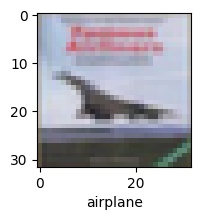

In [30]:
plot_sample(X_test, y_test,3)

In [31]:
classes[y_classes[3]]

'airplane'

In [32]:
classes[y_classes[3]]

'airplane'